In [42]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

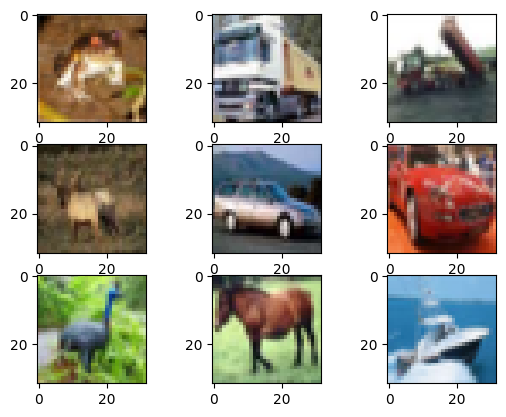

In [43]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
plt.show()

In [44]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [45]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)

(50000, 10)


In [46]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [47]:
x_train_float = x_train.astype("float32")
x_test_float = x_test.astype("float32")
x_train_normalized = x_train_float / 255
x_test_normalized = x_test_float / 255

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=5, activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=5, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(80, kernel_initializer="glorot_uniform", activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, kernel_initializer="glorot_uniform", activation="softmax"))

c:\Users\Matheus\Desktop\Matheus\Programming\Python\MachineLearning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
historic = model.fit(
    x_train_normalized,
    y_train,
    batch_size=200,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    verbose=1,
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.2510 - loss: 2.0077 - val_accuracy: 0.4727 - val_loss: 1.4631
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.4572 - loss: 1.4986 - val_accuracy: 0.5225 - val_loss: 1.3185
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.5182 - loss: 1.3471 - val_accuracy: 0.5649 - val_loss: 1.2217
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.5528 - loss: 1.2547 - val_accuracy: 0.5935 - val_loss: 1.1307
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.5848 - loss: 1.1704 - val_accuracy: 0.6218 - val_loss: 1.0994
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.6011 - loss: 1.1251 - val_accuracy: 0.6343 - val_loss: 1.0417
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6192 - loss: 1.0818 - val_accuracy: 0.6560 - val_loss: 1.0013
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.6342 - loss: 1.0446 - val_ac

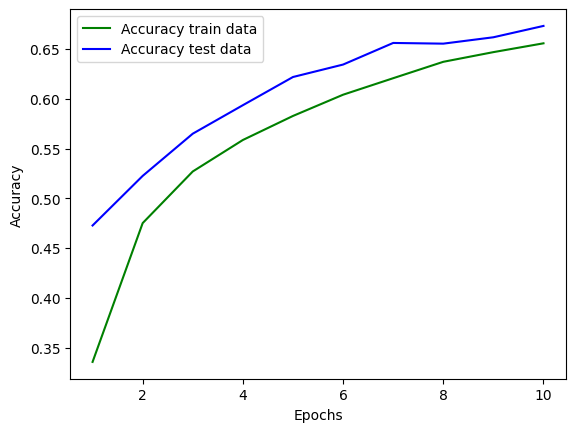

In [50]:
import matplotlib.pyplot as plt

accuracy_train = historic.history["accuracy"]
accuracy_test = historic.history["val_accuracy"]
epochs = range(1, len(accuracy_train) + 1)

plt.plot(epochs, accuracy_train, "-g", label="Accuracy train data")
plt.plot(epochs, accuracy_test, "-b", label="Accuracy test data")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()